Database created and connected!
Cursor created!
Students table created!
Grades table created!
Data inserted into the students table!
Data inserted into the grades table!
Students and their grades:
Student: Alice Johnson, Subject: Math, Grade: 95
Student: Alice Johnson, Subject: English, Grade: 88
Student: Alice Johnson, Subject: History, Grade: 90
Student: Bob Smith, Subject: Math, Grade: 82
Student: Bob Smith, Subject: English, Grade: 76
Student: Bob Smith, Subject: History, Grade: 85
Average grades for each student:
Student: Alice Johnson, Average Grade: 91.0
Student: Bob Smith, Average Grade: 81.0
Student with the highest grade average: Alice
Average grade for Math: 81.0
Students who scored above 90 in any subject
Student: Alice Johnson
Students and grade details:
('Alice', 'Johnson', 1, 'Math', 95)
('Alice', 'Johnson', 2, 'English', 88)
('Alice', 'Johnson', 3, 'History', 90)
('Bob', 'Smith', 4, 'Math', 82)
('Bob', 'Smith', 5, 'English', 76)
('Bob', 'Smith', 6, 'History', 85)


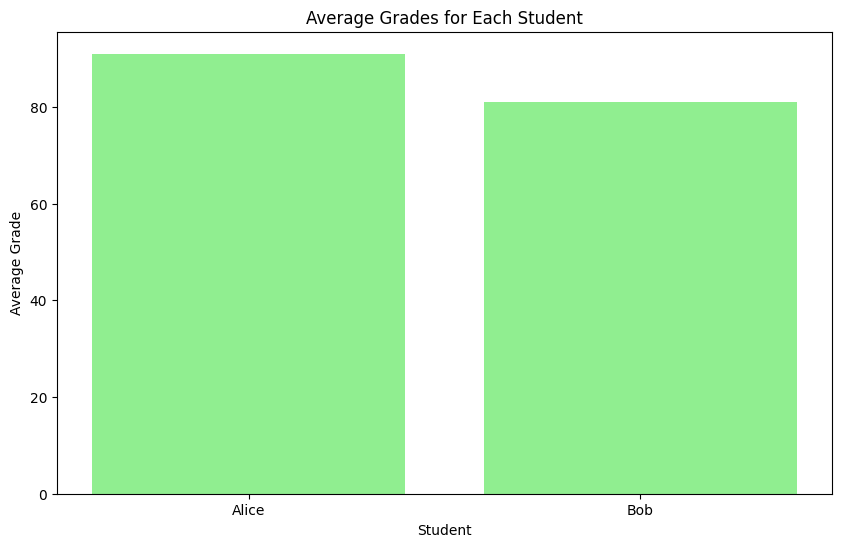

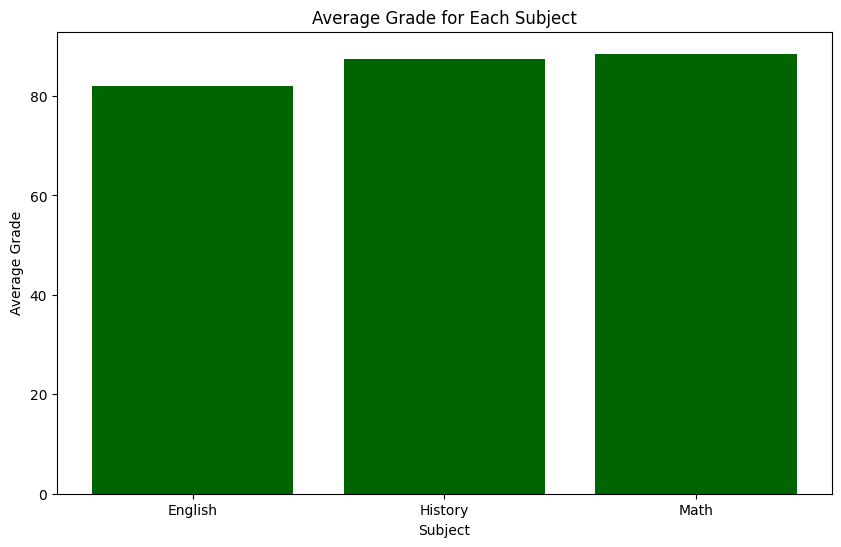

In [1]:
import sqlite3

connection = sqlite3.connect('student_grades.db')

print("Database created and connected!")


cursor = connection.cursor()

print("Cursor created!")

cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')

print("Students table created!")

cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES STUDENTS (student_id)
)
''')

print("Grades table created!")

students_data = [
    (1, 'Alice', 'Johnson'),
    (2, 'Bob', 'Smith'),
    (3, 'Carol', 'White'),
    (4, 'David', 'Brown'),
    (5, 'Eve', 'Davis')
]

cursor.executemany('''
INSERT INTO students (student_id, first_name, last_name) VALUES (?, ?, ?)
''', students_data)

connection.commit()

print("Data inserted into the students table!")

grades_data = [
    (1, 1, 'Math', 95),
    (2, 1, 'English', 88),
    (3, 1, 'History', 90),
    (4, 2, 'Math', 82),
    (5, 2, 'English', 76),
    (6, 2, 'History', 85)
]

cursor.executemany('''
INSERT INTO grades (grade_id, student_id, subject, grade) VALUES (?, ?, ?, ?)
''', grades_data)


connection.commit()

print("Data inserted into the grades table!")

cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id;
''')

student_grades = cursor.fetchall()

print("Students and their grades:")
for row in student_grades:
    first_name, last_name, subject, grade = row
    print(f"Student: {first_name} {last_name}, Subject: {subject}, Grade: {grade}")

cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id;
''')

average_grades = cursor.fetchall()

print("Average grades for each student:")
for row in average_grades:
    first_name, last_name, average_grade = row
    print(f"Student: {first_name} {last_name}, Average Grade: {average_grade}")

cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade)
FROM students
JOIN grades ON students.student_id = grades.student_id;
''')
highest_gradeaverage = cursor.fetchone()


print(f"Student with the highest grade average: {highest_gradeaverage[0]}")

cursor.execute('''
SELECT AVG(grade) FROM grades WHERE subject = 'Math';
''')
math_average = cursor.fetchone()

print(f"Average grade for Math: {average_grade}")

cursor.execute('''
SELECT students.first_name, students.last_name
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90;
''')

higher_than_90 = cursor.fetchall()

print("Students who scored above 90 in any subject")
for student in higher_than_90:
    first_name, last_name = student
    print(f"Student: {first_name} {last_name}")
    
import pandas as pd


df = pd.read_sql_query('SELECT * FROM students', connection)

df.head()

df = pd.read_sql_query('SELECT * FROM grades', connection)

df.head()

cursor.execute('''
SELECT students.first_name, students.last_name, grades.grade_id, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''')

joined_data = cursor.fetchall()
print("Students and grade details:")
for row in joined_data:
    print(row)
    
import matplotlib.pyplot as plt

cursor.execute('''
SELECT students.first_name, AVG(grades.grade) 
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
''')
average_grades = cursor.fetchall()


names = [row[0] for row in average_grades]
grades = [row[1] for row in average_grades]

plt.figure(figsize=(10, 6))
plt.bar(names,grades, color='lightgreen')
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Student')
plt.show()

cursor.execute('''
SELECT subject, AVG(grade) FROM grades
GROUP BY subject
''')
subject_averages = cursor.fetchall()

subjects = [row[0] for row in subject_averages]
average_subject_grades = [row[1] for row in subject_averages]

plt.figure(figsize=(10, 6))
plt.bar(subjects, average_subject_grades, color='darkgreen')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade for Each Subject')
plt.show()